# Gender Prediction
## team: KwonC

In [1]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Import

In [2]:
real_data=pd.read_csv(join('data','서울특별시_공공자전거_시간대별_대여정보_201812_201905(6).csv'), encoding='CP949')
real_data.head(2)

/home/una/miniconda3/envs/py/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-02-27,0,505,505. 자양사거리 광진아크로텔 앞,정기권,F,20대,1,23,0.28,1210,6
1,2019-02-27,0,1448,1448. 코스트코 상봉점,정기권,F,20대,1,25.48,0.23,990,5


## data preprocessing

In [3]:
genderless  = real_data.drop(real_data[real_data['성별'].notnull()].index)
gender = real_data
gender = gender.dropna(subset=['성별'])

In [4]:
dataset = gender[['성별','이용건수', '운동량', '탄소량','이동거리','사용시간']]
dataset.head(5)

,성별,이용건수,운동량,탄소량,이동거리,사용시간
0,F,1,23,0.28,1210,6
1,F,1,25.48,0.23,990,5
2,F,1,37.85,0.38,1620,10
3,F,1,11.94,0.13,580,3
4,F,2,87.98,0.87,3770,20


In [5]:
dataset.shape

(750950, 6)

In [6]:
class_counts = dataset.groupby('성별').size()
print(class_counts)

성별
F    264640
M    486310
dtype: int64


In [7]:
dataset.loc[dataset['성별'] == 'f', '성별'] = 'F'
dataset.loc[dataset['성별'] == 'm', '성별'] = 'M'

/home/una/miniconda3/envs/py/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
dataset.dtypes

성별      object
이용건수     int64
운동량     object
탄소량     object
이동거리     int64
사용시간     int64
dtype: object

In [9]:
idx_n = dataset[dataset['운동량']=='\\N'].index
dataset = dataset.drop(idx_n)
dataset['운동량'] = pd.to_numeric(dataset['운동량'])

In [10]:
idx_n = dataset[dataset['탄소량']=='\\N'].index
dataset = dataset.drop(idx_n)
dataset['탄소량'] = pd.to_numeric(dataset['탄소량'])

In [11]:
dataset['탄소량'] = pd.to_numeric(dataset['탄소량'] / dataset['이용건수'])
dataset['운동량'] = pd.to_numeric(dataset['운동량'] / dataset['이용건수'])
dataset['사용시간'] = pd.to_numeric(dataset['사용시간'] / dataset['이용건수'])
dataset['이동거리'] = pd.to_numeric(dataset['이동거리'] / dataset['이용건수'])
del dataset['이용건수']

In [12]:
correlations = dataset.corr(method='pearson')
print(correlations)

           운동량       탄소량      이동거리      사용시간
운동량   1.000000  0.977466  0.982096  0.221882
탄소량   0.977466  1.000000  0.995369  0.229285
이동거리  0.982096  0.995369  1.000000  0.230456
사용시간  0.221882  0.229285  0.230456  1.000000


In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [14]:
dataset.head(11)

,성별,운동량,탄소량,이동거리,사용시간
0,F,23.00,0.280,1210.0,6.0
1,F,25.48,0.230,990.0,5.0
2,F,37.85,0.380,1620.0,10.0
3,F,11.94,0.130,580.0,3.0
4,F,43.99,0.435,1885.0,10.0
5,F,57.70,0.550,2350.0,14.0
6,F,43.86,0.480,2090.0,49.0
7,F,53.58,0.570,2460.0,9.0
8,F,47.32,0.550,2390.0,10.0
9,F,19.64,0.200,870.0,3.0


In [15]:
dataset.dtypes

성별       object
운동량     float64
탄소량     float64
이동거리    float64
사용시간    float64
dtype: object

/home/una/miniconda3/envs/py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/una/miniconda3/envs/py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/una/miniconda3/envs/py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/una/miniconda3/envs/py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/una/miniconda3/envs/py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/una/miniconda3/envs/py/lib/python3.7/site-package

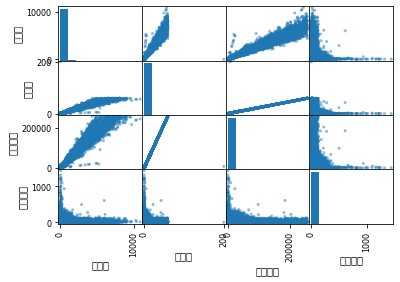

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

In [17]:
test = dataset.iloc[-100:,:]
train = dataset.iloc[:-100,:]

print(dataset.shape)
print(test.shape)
print(train.shape)

(749665, 5)
(100, 5)
(749565, 5)


In [18]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(train.iloc[:,1:], train.iloc[:,0], test_size=0.3, random_state=123)

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
y1 = encoder.fit_transform(trny)
trny = pd.get_dummies(y1).values
trny

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

In [20]:
encoder =  LabelEncoder()
y1 = encoder.fit_transform(tsty)
tsty = pd.get_dummies(y1).values
tsty

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [21]:
trnx.shape, tstx.shape, trny.shape, tsty.shape

((524695, 4), (224870, 4), (524695, 2), (224870, 2))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
trnx = scaler.fit_transform(trnx)
tstx = scaler.transform(tstx)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(10, kernel_initializer='uniform',input_shape=(4,),activation='relu'))
model.add(Dense(20, kernel_initializer='uniform',activation='relu'))
model.add(Dense(10, kernel_initializer='uniform',activation='relu'))
model.add(Dense(2, kernel_initializer='uniform',activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________


In [24]:
hist = model.fit(trnx, trny, validation_data=(tstx, tsty), batch_size=10, epochs=50)

Epoch 1/50
52470/52470 [==============================] - 108s 2ms/step - loss: 0.5892 - accuracy: 0.6920 - val_loss: 0.4925 - val_accuracy: 0.7564
Epoch 2/50
52470/52470 [==============================] - 88s 2ms/step - loss: 0.4812 - accuracy: 0.7756 - val_loss: 0.4502 - val_accuracy: 0.7910
Epoch 3/50
52470/52470 [==============================] - 70s 1ms/step - loss: 0.4618 - accuracy: 0.7840 - val_loss: 0.4510 - val_accuracy: 0.7970
Epoch 4/50
52470/52470 [==============================] - 67s 1ms/step - loss: 0.4540 - accuracy: 0.7867 - val_loss: 0.4355 - val_accuracy: 0.7915
Epoch 5/50
52470/52470 [==============================] - 75s 1ms/step - loss: 0.4521 - accuracy: 0.7874 - val_loss: 0.4342 - val_accuracy: 0.7989
Epoch 6/50
52470/52470 [==============================] - 75s 1ms/step - loss: 0.4497 - accuracy: 0.7886 - val_loss: 0.4301 - val_accuracy: 0.7969
Epoch 7/50
52470/52470 [==============================] - 71s 1ms/step - loss: 0.4471 - accuracy: 0.7901 - val_loss: 

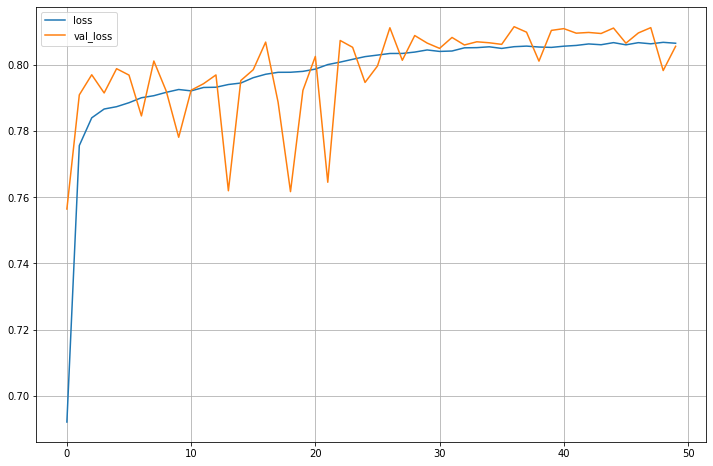

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

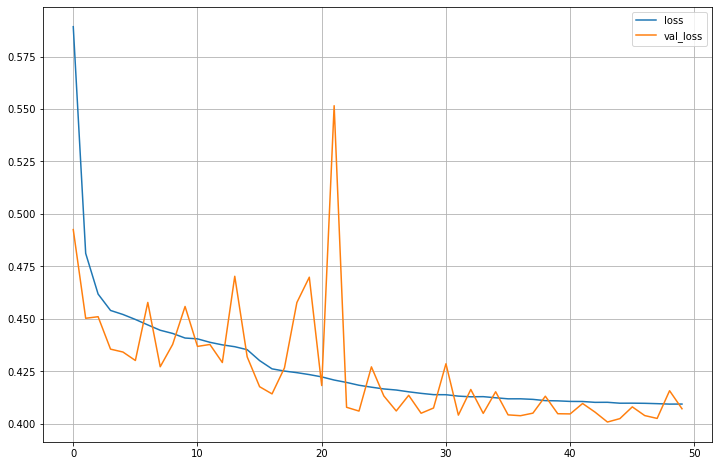

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

## 30개의 test data를 이용해 예측이 잘 되는지 정확도 확인

In [27]:
test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]

In [28]:
encoder =  LabelEncoder()
y1 = encoder.fit_transform(test_y)
test_y = pd.get_dummies(y1).values

In [29]:
test_x = scaler.transform(test_x)

In [30]:
loss, accuracy = model.evaluate(test_x, test_y)
print("Accuracy = {:.2f}".format(accuracy))

4/4 [==============================] - 0s 833us/step - loss: 0.4412 - accuracy: 0.7700
Accuracy = 0.77


In [33]:
from sklearn.metrics import accuracy_score
pred_out = model.predict(test_x)

y_real =[]
y_pred=[]
class_names=['F','M']

for i,pred in zip(range(0, len(pred_out)), pred_out) :
    y_real.append(class_names.index(class_names[test_y[i,1]]))
    y_pred.append(np.argmax(pred))
    
# get the accuracy
print (accuracy_score(y_real, y_pred))

0.77


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_real, y_pred)

array([[ 4,  0],
       [23, 73]])

In [35]:
tn, fp, fn, tp = confusion_matrix(y_real, y_pred).ravel()

In [36]:
accuracy = (tp+tn) / (tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
false_alarm = fp / (fp+tn)
tpr = tp / (tp+fn)
tnr = tn / (tn+fp)
fpr = fp / (fp+tn)
fnr = fn / (tp+fn)

In [37]:
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("false_alarm:",false_alarm)
print("true positive rate:",tpr)
print("true negative rate:",tnr)
print("false positive rate:",fpr)
print("false negative rate:",fnr)

accuracy: 0.77
precision: 1.0
recall: 0.7604166666666666
false_alarm: 0.0
true positive rate: 0.7604166666666666
true negative rate: 1.0
false positive rate: 0.0
false negative rate: 0.23958333333333334


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_real, y_pred, target_names=['F', 'M']))

              precision    recall  f1-score   support

           F       0.15      1.00      0.26         4
           M       1.00      0.76      0.86        96

    accuracy                           0.77       100
   macro avg       0.57      0.88      0.56       100
weighted avg       0.97      0.77      0.84       100



### 성별이 없는 데이터를 input으로 이용해 성별 측정 후 기존 데이터와 합쳐 csv파일 생성

In [38]:
idx_n = genderless[genderless['운동량']=='\\N'].index
genderless = genderless.drop(idx_n)
genderless['운동량'] = pd.to_numeric(genderless['운동량'])

In [39]:
idx_n = genderless[genderless['탄소량']=='\\N'].index
genderless = genderless.drop(idx_n)
genderless['탄소량'] = pd.to_numeric(genderless['탄소량'])

In [40]:
pred_dataset = genderless[['성별','이용건수', '운동량', '탄소량','이동거리','사용시간']]
pred_dataset.head(5)

,성별,이용건수,운동량,탄소량,이동거리,사용시간
392875,NaN,1,11.07,0.10,430,2
392876,NaN,1,35.20,0.29,1270,5
392877,NaN,2,341.19,3.46,14890,74
392878,NaN,1,147.33,1.22,5240,28
392879,NaN,1,34.91,0.35,1520,9


In [41]:
pred_dataset.shape

(273335, 6)

In [42]:
pred_dataset['탄소량'] = pd.to_numeric(pred_dataset['탄소량'] / pred_dataset['이용건수'])
pred_dataset['운동량'] = pd.to_numeric(pred_dataset['운동량'] / pred_dataset['이용건수'])
pred_dataset['사용시간'] = pd.to_numeric(pred_dataset['사용시간'] / pred_dataset['이용건수'])
pred_dataset['이동거리'] = pd.to_numeric(pred_dataset['이동거리'] / pred_dataset['이용건수'])
del pred_dataset['이용건수']

/home/una/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/una/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/una/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [43]:
pred_dataset = pred_dataset.iloc[:,1:]

In [44]:
pred_out_data = model.predict(pred_dataset)

In [45]:
pred_out_class = []
for i,pred in zip(range(0, len(pred_out_data)), pred_out_data) :
    pred_out_class.append(class_names[np.argmax(pred)])

In [46]:
pred_out_class = np.array(pred_out_class)

In [47]:
genderless['성별'] = pred_out_class.T

In [48]:
pred_gender_data = np.concatenate((gender,genderless),axis=0)

In [49]:
header=['대여일자','대여시간','대여소번호','대여소명','대여구분코드','성별','연령대코드','이용건수','운동량','탄소량','이동거리','사용시간']
dataframe = pd.DataFrame(pred_gender_data)
dataframe.to_csv("./data/서울특별시_공공자전거_시간대별_대여정보_201812_201905(6)_new.csv",header=header, index=False, encoding='utf-8-sig')